# **Введение**


Мой проект - это телеграм бот, созданный для помощи в подборе аниме на основе ваших предпочтений. Он использует технологии машинного обучения, чтобы найти похожие аниме на то, которое вас заинтересовало.

**Как это работает?**

Просто введите название аниме, которое вам понравилось, и бот предоставит вам список похожих аниме. Моя модель основана на анализе данных и предлагает рекомендации, учитывая сходство с вашими предпочтениями.

**Цель проекта.**

Цель этого проекта - сделать процесс выбора нового аниме более удобным и увлекательным. Я стремлюсь предоставить вам рекомендации, чтобы вы могли погрузиться в увлекательный мир аниме и насладиться просмотром.

Ознакомиться с проектом также можно по ссылке на гитхаб https://github.com/anastynero/anime_recommendation

# Сбор и предобработка данных

Импортируем библиотеки


In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

import warnings
warnings.filterwarnings('ignore')

Скачать датасет можно по ссылке - https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/data

Этот набор данных содержит информацию о предпочтениях пользователей от 73 516 пользователей в отношении 12 294 аниме. Каждый пользователь может добавить аниме в свой заполненный список и присвоить ему рейтинг, и этот набор данных представляет собой компиляцию этих оценок.

In [ ]:
anime_data=pd.read_csv('anime.csv')
rating_data=pd.read_csv('rating.csv')
print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())

The shape of the  data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [9]:
print ("The shape of the  data is (row, column):"+ str(rating_data.shape))
print (rating_data.info())

The shape of the  data is (row, column):(161719, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161719 entries, 0 to 161718
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   161719 non-null  int64  
 1   anime_id  161718 non-null  float64
 2   rating    161718 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 3.7 MB
None


Информация о данных:

**anime_data**:

anime_id - уникальный идентификатор для аниме.

name - полное название аниме.

genre - разделенный запятыми список жанров аниме.

type - тип аниме(например, фильм, TV, OVA).

episodes - сколько эпизодов в аниме. (1, если это фильм).

rating - средняя оценка по 10-балльной шкале.

members -  количество участников сообщества, которые находятся в
"группе" этого аниме.

**rating_data**:

user_id - случайно сгенерированный идентификатор пользователя.

anime_id - аниме, которое оценил этот пользователь.

rating - оценка по 10-балльной шкале, присвоенная этим пользователем (-1, если пользователь посмотрел его, но не присвоил оценку).

In [10]:
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

anime_id     anime_title                                 genre   type  \
0     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
1     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
2     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
3     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
4     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   

  episodes  rating  members  user_id  user_rating  
0        1    9.37   200630       99          5.0  
1        1    9.37   200630      152         10.0  
2        1    9.37   200630      244         10.0  
3        1    9.37   200630      271         10.0  
4        1    9.37   200630      278         -1.0

# Анализ и визуализация данных

Для того, чтобы лучше понимать данные, нужно провести анализ и визуализацию данных. Для начала я решила визуализировать топ-10 аниме на основе количества пользовательских оценок.


Text(0, 0.5, 'Пользовательский рейтинг')

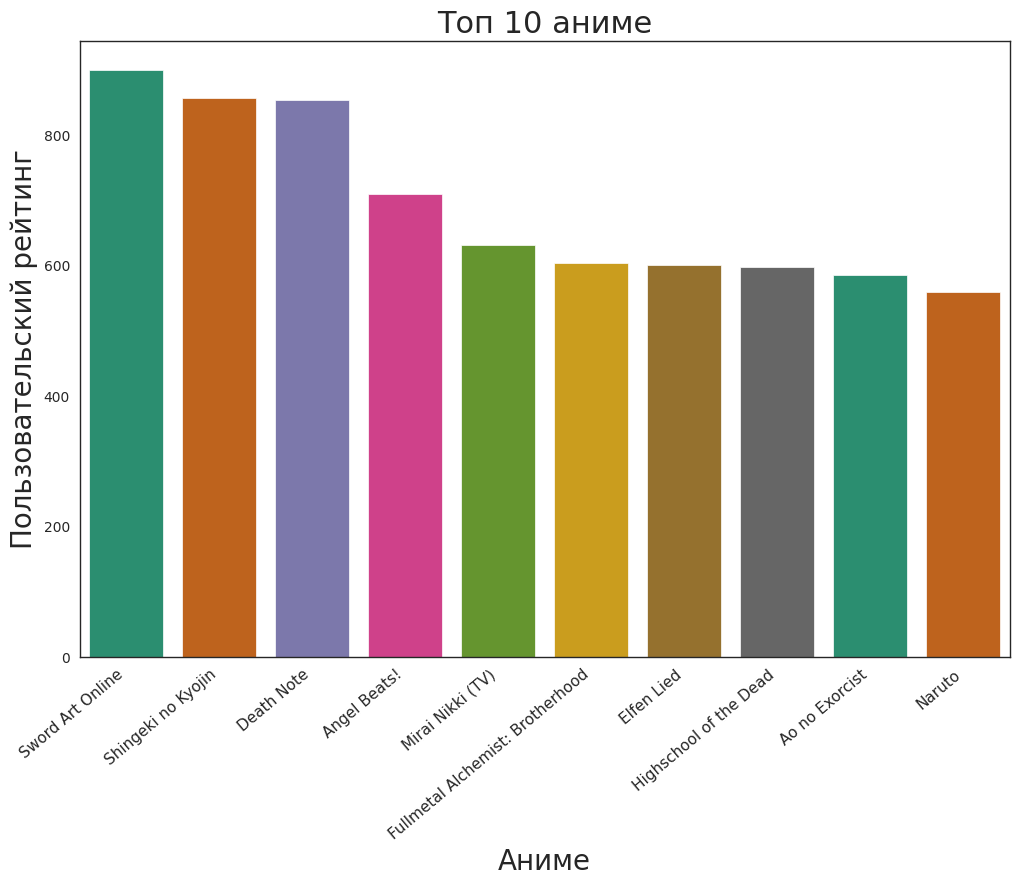

In [11]:
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )


top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Топ 10 аниме',fontsize = 22)
ax.set_xlabel('Аниме',fontsize = 20)
ax.set_ylabel('Пользовательский рейтинг', fontsize = 20)

"Death Note" лидирует по количеству оценок, за ним следуют "Sword Art Online" и "Attack on Titan".

In [12]:
# добавляем информацию о общем количестве рейтингов к каждой записи в anime_fulldata
anime_fulldata = anime_fulldata.merge(anime_ratingCount, left_on = 'anime_title', right_on = 'anime_title', how = 'left')
anime_fulldata = anime_fulldata.rename(columns={'user_rating_x': 'user_rating', 'user_rating_y': 'totalratingcount'})

In [13]:
# удаляем дубликаты
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title",
                     keep = 'first', inplace = True)

Визуализируем топ-10 аниме на основе количества участников в сообществе

Text(0, 0.5, 'Объем сообщества')

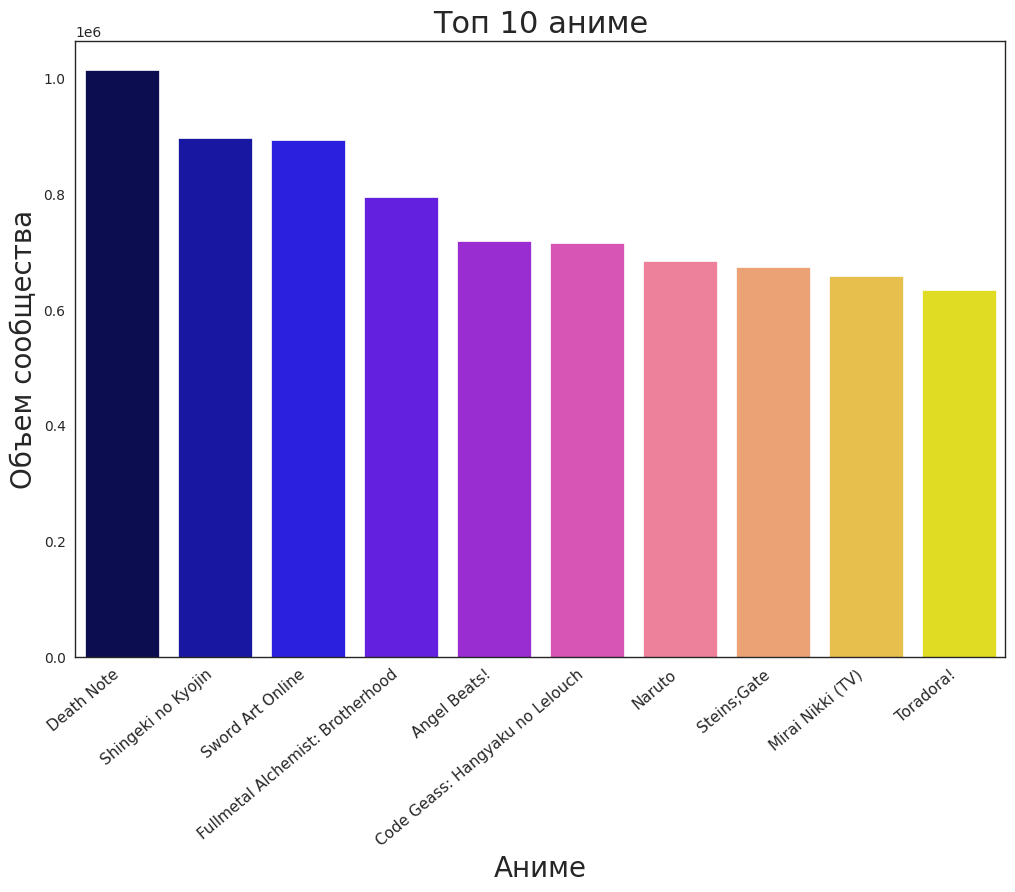

In [14]:
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Топ 10 аниме',fontsize = 22)
ax.set_xlabel('Аниме',fontsize = 20)
ax.set_ylabel('Объем сообщества', fontsize = 20)

"Death Note" лидирует по объему сообщества, за ним следуют "Shingeki no Kyojin" и "Sword Art Online".

Сейчас я буду анализировать распределение рейтингов в обоих наборах данных. Я полагаю, что рейтинг из файла anime.csv - это оценки с веб-сайтов с обзорами, а 'user_rating' из файла rating.csv - это оценки от пользователей.

Text(0.5, 1.0, 'Оценки от пользователей')

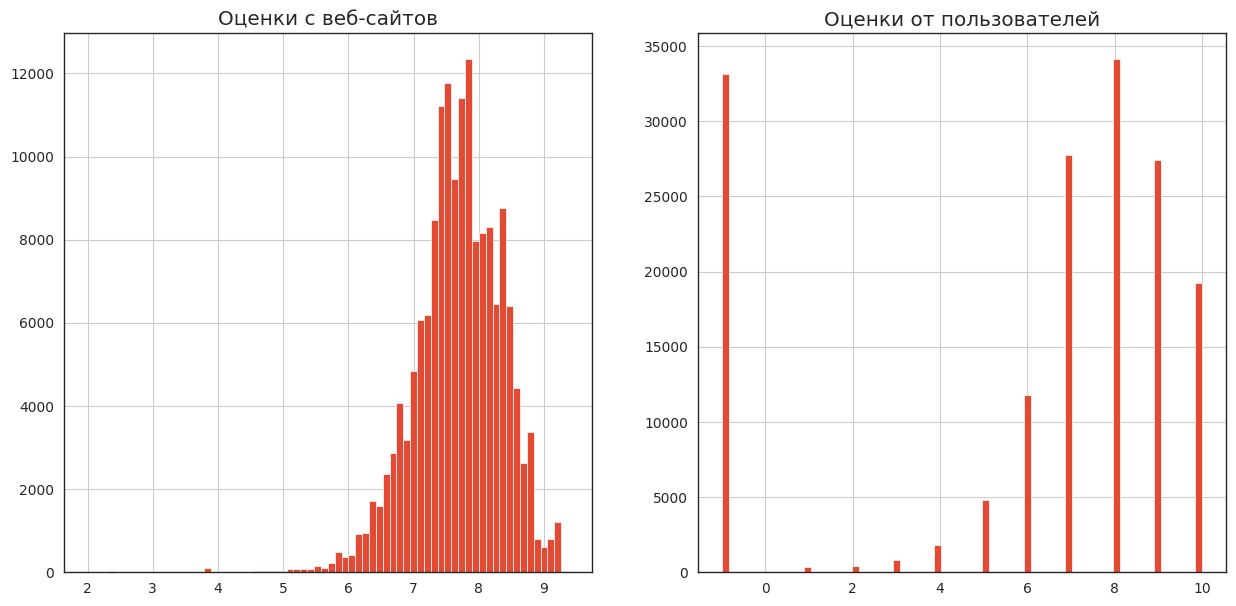

In [15]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title("Оценки с веб-сайтов")
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title("Оценки от пользователей")

**Выводы:**

*   Большинство оценок сосредоточены в диапазоне от 6 до 10.
*   Мода распределения находится примерно между 7,5 и 8,0.
*   Оба распределения имеют левостороннюю асимметрию.
*   У нас есть выброс в виде оценки -1 в рейтинге пользователей, который можно преобразовать в значение NaN.


Создадим круговую диаграмму, отображающую доли различных типов потокового контента в наборе данных.

In [16]:
import plotly.graph_objects as go
labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Средство потоковой передачи",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()


**Выводы**


*   71.5% аниме были показаны по телевизору, за ними идут 11.8% через кинопоказы.
*   8.53% аниме доступны в формате OVA, что больше, чем ONA (1.12%).



Далее создадим облако слов по жанрам(Genre Word Cloud)


(-0.5, 799.5, 399.5, -0.5)

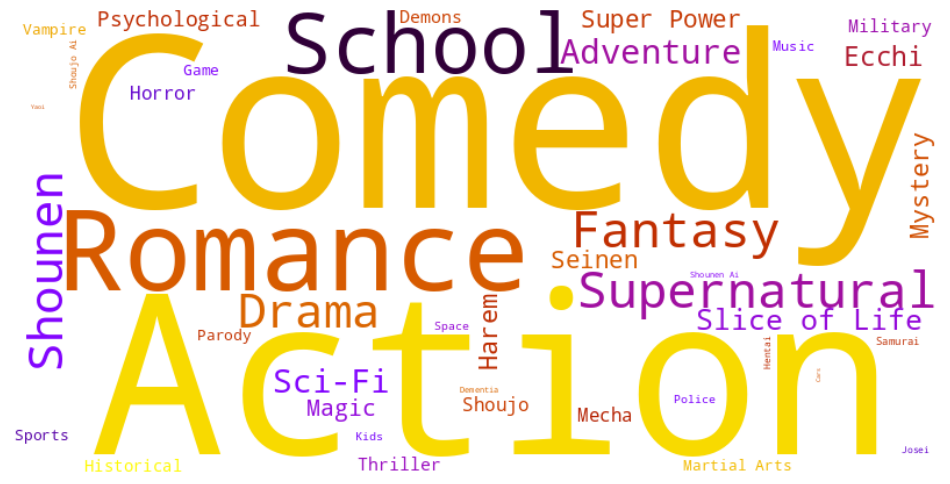

In [17]:
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

Мы можем заметить, что в нашем наборе данных много аниме в жанре комедии, за которым следуют экшн и романтика.

# Подготовка данных для использования

Сначала нужно позаботиться о значениях NaN, поскольку это связано с рейтингами, и пользователь, который не дал оценку, не добавляет никакой ценности. Давайте избавимся от значений NaN.

In [18]:
anime_feature=anime_fulldata.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

anime_id     anime_title                                 genre   type  \
0     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
1     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
2     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
3     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
4     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   

  episodes  rating  members  user_id  user_rating  totalratingcount  
0        1    9.37   200630       99          5.0                42  
1        1    9.37   200630      152         10.0                42  
2        1    9.37   200630      244         10.0                42  
3        1    9.37   200630      271         10.0                42  
4        1    9.37   200630      278          NaN                42

In [19]:
anime_feature = anime_feature.dropna(axis = 0, how ='any')
anime_feature.isnull().sum()

anime_id            0
anime_title         0
genre               0
type                0
episodes            0
rating              0
members             0
user_id             0
user_rating         0
totalratingcount    0
dtype: int64

Давайте проверим количество идентификаторов пользователей (user id) и отфильтруем данные на основе этого.

In [20]:
anime_feature['user_id'].value_counts()

1530    1584
1497    1040
1145     904
1456     877
478      863
        ... 
536        1
555        1
59         1
742        1
355        1
Name: user_id, Length: 1504, dtype: int64

Есть пользователи, которые поставили всего одну оценку, и даже если это была оценка 5, это нельзя считать ценной записью для рекомендаций. Поэтому я установила минимальное значение порога в 200 оценок от пользователя.

In [21]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

Эта сводная таблица имеет строки с названиями и столбцы с идентификаторами пользователей. Она поможет нам создать разреженную матрицу, которая может быть очень полезной при вычислении косинусной схожести.


In [22]:
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id                                             5     7     17    38    \
anime_title                                                                  
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...   0.0   0.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Memoire                   0.0   0.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Movie                     0.0   0.0   0.0   0.0   
.hack//G.U. Returner                                 0.0   0.0   0.0   0.0   
.hack//G.U. Trilogy                                  0.0   0.0   0.0   0.0   

user_id                                             43    46    123   129   \
anime_title                                                                  
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...   0.0   0.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Memoire                   0.0   0.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Movie                     0.0   0.0   0.0   0.0   
.hack//G.U. Returner                                 0.0   0.0   0.0   0.0   
.hack//G.U. Trilogy                                  0.0   0.0   0.0   0.0   

user_id                                             139   160   210   226   \
anime_title                                                                  
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...   0.0   7.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Memoire                   0.0   8.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Movie                     0.0   8.0   0.0   0.0   
.hack//G.U. Returner                                 0.0   8.0   0.0   0.0   
.hack//G.U. Trilogy                                  0.0   8.0   0.0   0.0   

user_id                                             233   235   244   248   \
anime_title                                                                  
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...   0.0   0.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Memoire                   0.0   0.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Movie                     0.0   0.0   0.0   0.0   
.hack//G.U. Returner                                 0.0   0.0   0.0   0.0   
.hack//G.U. Trilogy                                  0.0   0.0   0.0   0.0   

user_id                                             250   256   261   271   \
anime_title                                                                  
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...   0.0   0.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Memoire                   0.0   0.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Movie                     0.0   0.0   0.0   0.0   
.hack//G.U. Returner                                 0.0   0.0   0.0   0.0   
.hack//G.U. Trilogy                                  0.0   0.0   0.0   0.0   

user_id                                             282   288   294   301   \
anime_title                                                                  
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...   0.0   0.0   7.0   0.0   
&quot;Bungaku Shoujo&quot; Memoire                   0.0   0.0   8.0   0.0   
&quot;Bungaku Shoujo&quot; Movie                     0.0   0.0   8.0   0.0   
.hack//G.U. Returner                                 0.0   0.0   0.0   0.0   
.hack//G.U. Trilogy                                  0.0   0.0   0.0   0.0   

user_id                                             308   317   321   326   \
anime_title                                                                  
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...   0.0   0.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Memoire                   0.0   0.0   0.0   0.0   
&quot;Bungaku Shoujo&quot; Movie                     0.0   0.0   0.0   0.0   
.hack//G.U. Returner                                 0.0   0.0   0.0   0.0   
.hack//G.U. Trilogy                                  0.0   0.0   0.0   0.0   

user_id                                             341   352   385   392   \
anime_title                                                                  
&quot;Bungaku S

# Построение модели


Косинусная схожесть - это метрика, используемая для измерения степени сходства документов независимо от их размера. В математическом смысле она измеряет косинус угла между двумя векторами, проецируемыми в многомерном пространстве. Косинусная схожесть полезна, потому что даже если два схожих документа находятся далеко друг от друга в евклидовом расстоянии (из-за размера документа), есть вероятность, что они всё же будут ближе друг к другу в ориентации. Чем меньше угол, тем выше косинусная схожесть.

In [23]:
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Мы подготовили разреженную матрицу. Давайте выберем случайное название аниме и найдем рекомендации для него.

In [24]:
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

1597



Здесь мы возвращаем расстояния и индексы 6 соседей с помощью метода ближайших соседей (KNN) от случайно выбранного индекса (названия аниме). Они будут представлять наши рекомендованные аниме.

In [25]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Hidan no Aria:

1: Mayo Chiki!, with distance of 0.3552896114211418:
2: Hidan no Aria Special, with distance of 0.35595889244766143:
3: High School DxD New, with distance of 0.36166145994419574:
4: High School DxD, with distance of 0.36196176596851637:
5: Date A Live, with distance of 0.36482437553311087:


Как мы видим, это рекомендации для аниме . Но этот код не обладает достаточной гибкостью выбора. Давайте попробуем другой подход, например, **фильтрация на основе контента**.


Фильтрация на основе контента, также известная как когнитивная фильтрация, рекомендует элементы на основе сравнения содержимого элементов и профиля пользователя. Содержание каждого элемента представлено в виде набора описателей или терминов, обычно слов, встречающихся в документе.

Рекомендательная система на основе контента работает с данными, которые предоставляет пользователь, либо явно (рейтинги), либо неявно (кликнув по ссылке). На основе этих данных создается профиль пользователя, который затем используется для предоставления рекомендаций пользователю. По мере того, как пользователь предоставляет больше данных или выполняет действия по рекомендациям, движок становится все более точным.

Я обнаружила много символов в названиях аниме. Давайте удалим их с помощью этой функции.

In [26]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

Далее используем TF-IDF для жанра, чтобы мы могли рекомендовать пользователям аниме на основе содержания жанра.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [28]:
tfv_matrix.shape

(12294, 1554)


Scikit-learn уже предоставляет попарные метрики (также называемые ядрами в терминологии машинного обучения), которые работают как для плотных, так и для разреженных представлений коллекций векторов. Здесь нам нужно назначить 1 для рекомендованного аниме и 0 для нерекомендованного. Поэтому мы используем сигмоидное ядро.

In [29]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [30]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

Здесь мы создаем функцию для получения рекомендаций для аниме. Мы преобразуем оценки сходства в списки с помощью функции enumerate, сортируем список и выбираем топ-10 оценок для рекомендаций.

In [31]:
def give_rec(title, sig=sig):
    idx = indices[title]

    sig_scores = list(enumerate(sig[idx]))

    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    sig_scores = sig_scores[1:11]

    anime_indices = [i[0] for i in sig_scores]

    return pd.DataFrame({'Название аниме': anime_data['name'].iloc[anime_indices].values,
                                 'Рейтинг': anime_data['rating'].iloc[anime_indices].values})

Проверим, как работает наша функция

In [32]:
give_rec('Naruto')

Название аниме  Рейтинг
0                                 Naruto: Shippuuden     7.94
1                                             Naruto     7.81
2  Boruto: Naruto the Movie - Naruto ga Hokage ni...     7.68
3                                        Naruto x UT     7.58
4        Naruto: Shippuuden Movie 4 - The Lost Tower     7.53
5  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...     7.50
6               Naruto Shippuuden: Sunny Side Battle     7.26
7  Naruto Soyokazeden Movie: Naruto to Mashin to ...     7.11
8                      Battle Spirits: Ryuuko no Ken     4.89
9                            Kyutai Panic Adventure!     5.21

In [33]:
give_rec('Steins;Gate')

Название аниме  Рейтинг
0         Steins;Gate Movie: Fuka Ryouiki no Déjà vu     8.61
1              Steins;Gate: Oukoubakko no Poriomania     8.46
2  Steins;Gate: Kyoukaimenjou no Missing Link - D...     8.34
3                                      Steins;Gate 0      NaN
4                                      Under the Dog     6.55
5                                       Loups=Garous     6.43
6                                 Loups=Garous Pilot     5.87
7                                        Ibara no Ou     7.24
8           Arve Rezzle: Kikaijikake no Yousei-tachi     6.44
9                                    Higashi no Eden     8.03

In [34]:
give_rec('One Piece')

Название аниме  Рейтинг
0  One Piece: Episode of Merry - Mou Hitori no Na...     8.29
1  One Piece: Episode of Nami - Koukaishi no Nami...     8.27
2  One Piece: Episode of Sabo - 3 Kyoudai no Kizu...     7.78
3                       One Piece Film: Strong World     8.42
4                                  One Piece Film: Z     8.39
5                               One Piece Film: Gold     8.32
6                           One Piece: Heart of Gold     7.75
7                                   Digimon Frontier     7.25
8                                     Digimon Tamers     7.65
9                                     Digimon Savers     7.10

# Создание Telegram-бота


В качестве интерфейса я выбрала создание телеграм-бота.
Для начала я перешла в специальный телеграм-бот BotFather  и с помощью команды /newbot создала своего бота для аниме-рекомендаций.

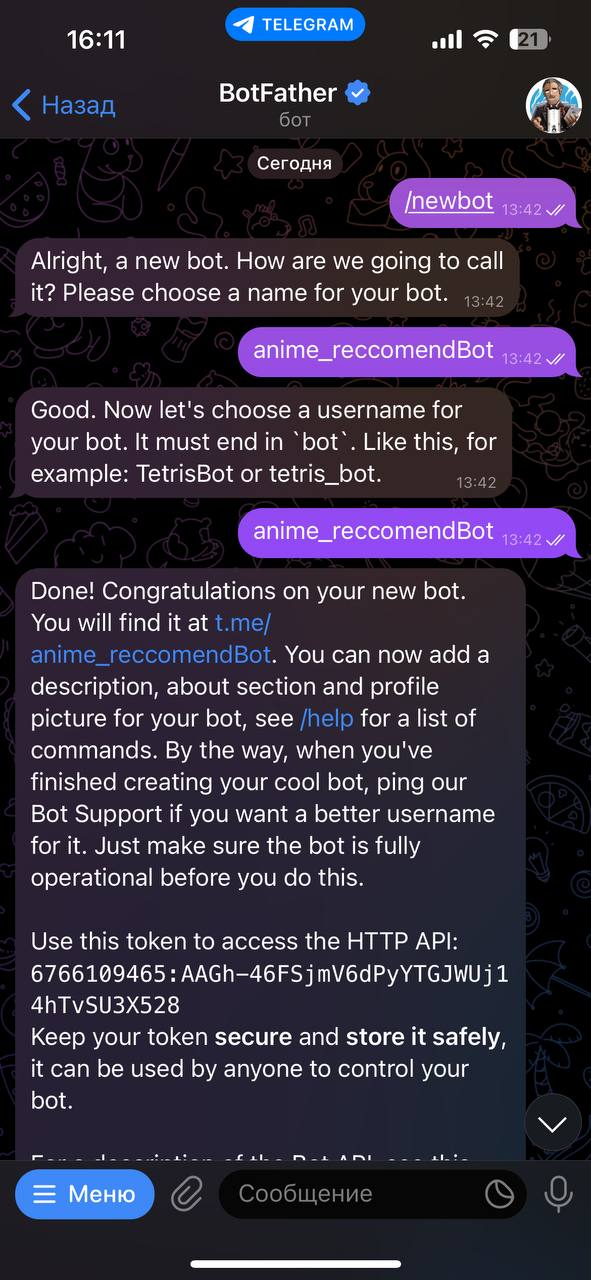

Используя библиотеку pyTelegramBotAPI я подключила своего телеграм-бота к файлу main.py через токен. Далее я добавила 2 обработчика событий, первый для приветствия, второй для получения названия аниме и вывода 10 похожих аниме. Похожие аниме подбираются с помощью функции give_rec, которая находится в файле anime.py

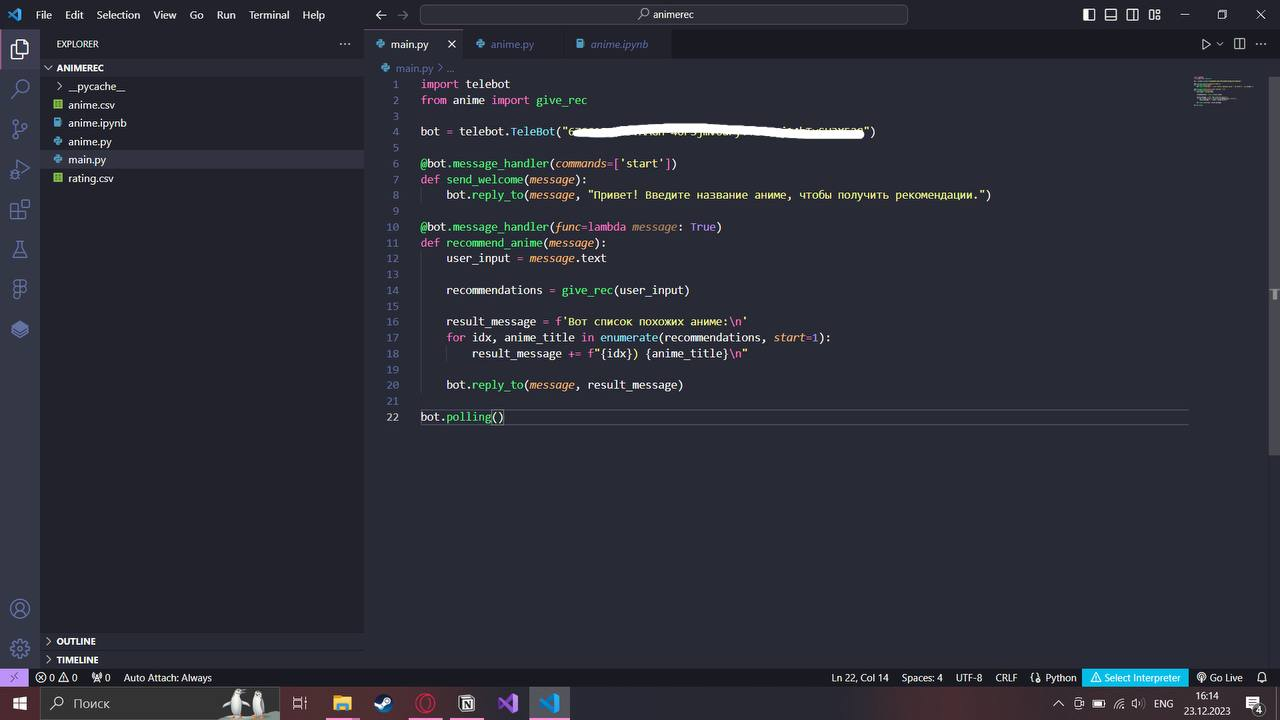

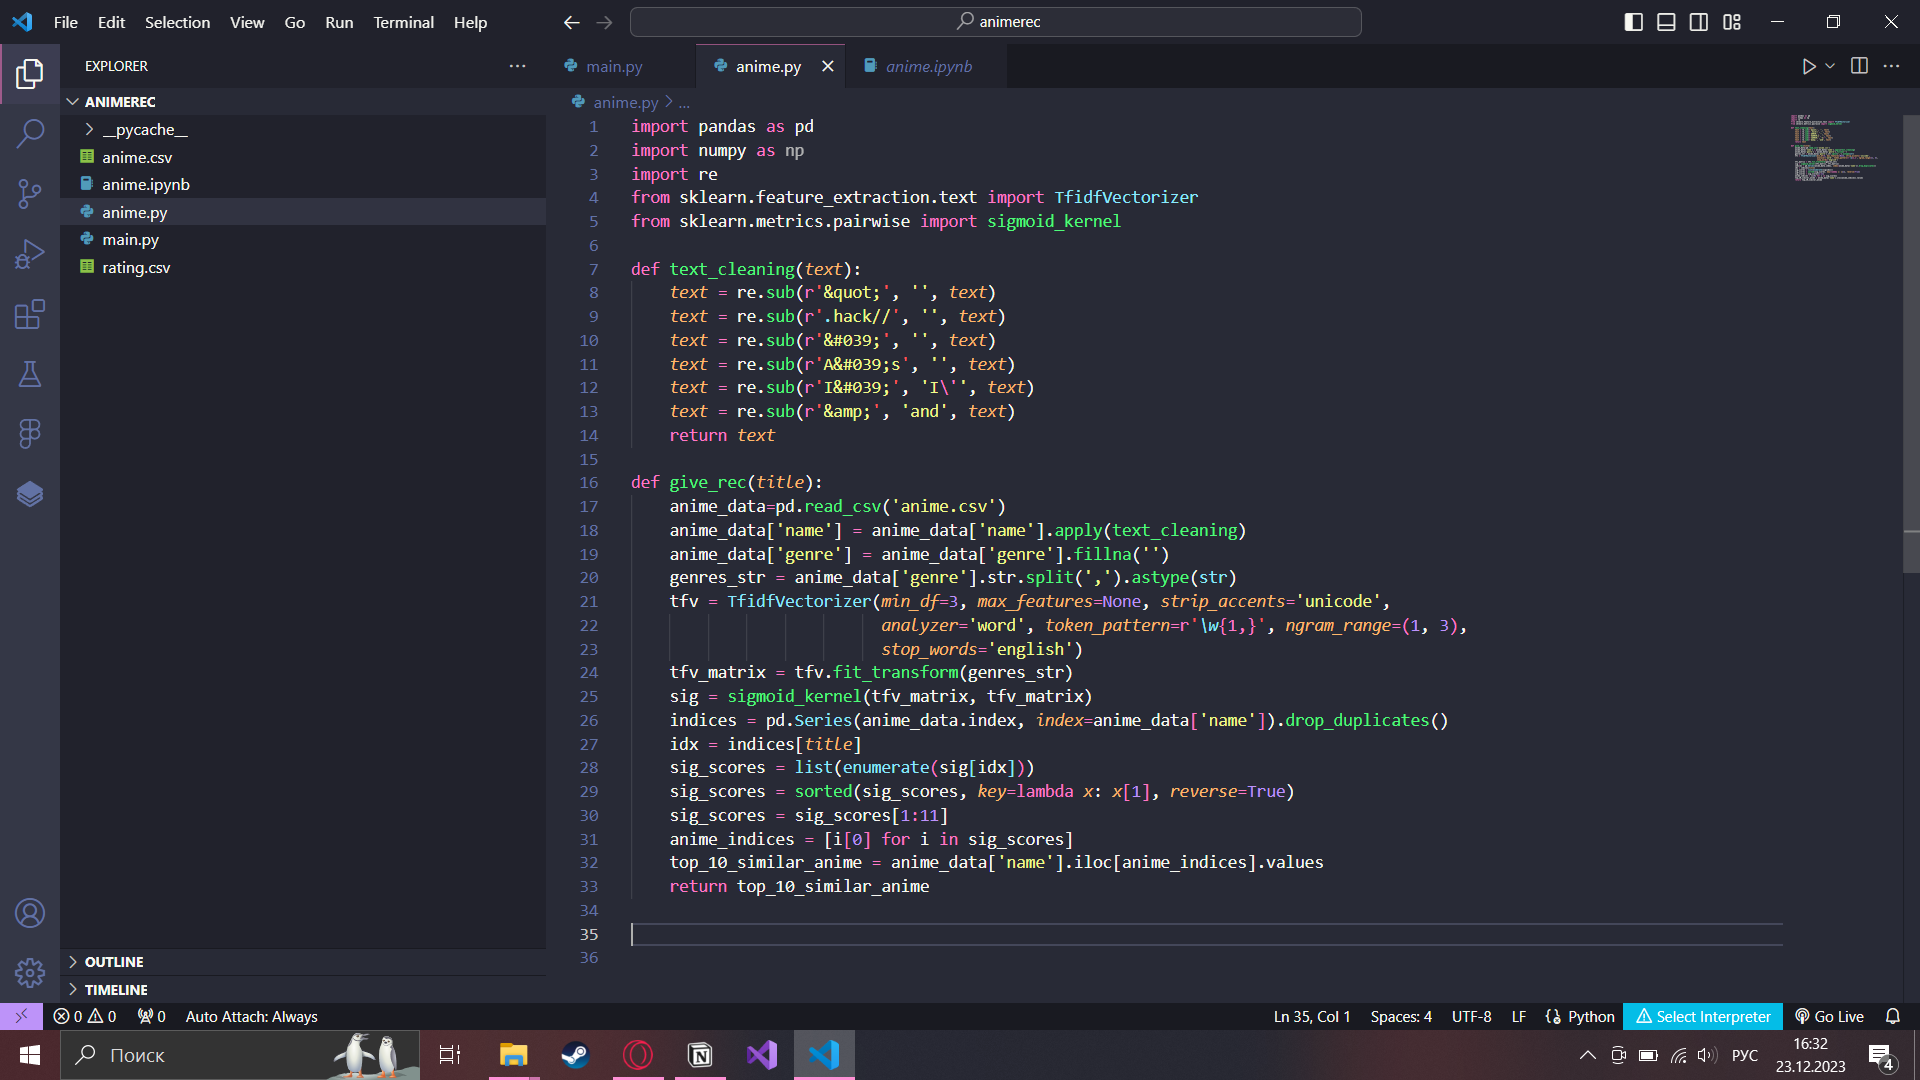

Для того, чтобы запустить бота, нужно открыть терминал и ввести команду

```
 py main.py
```



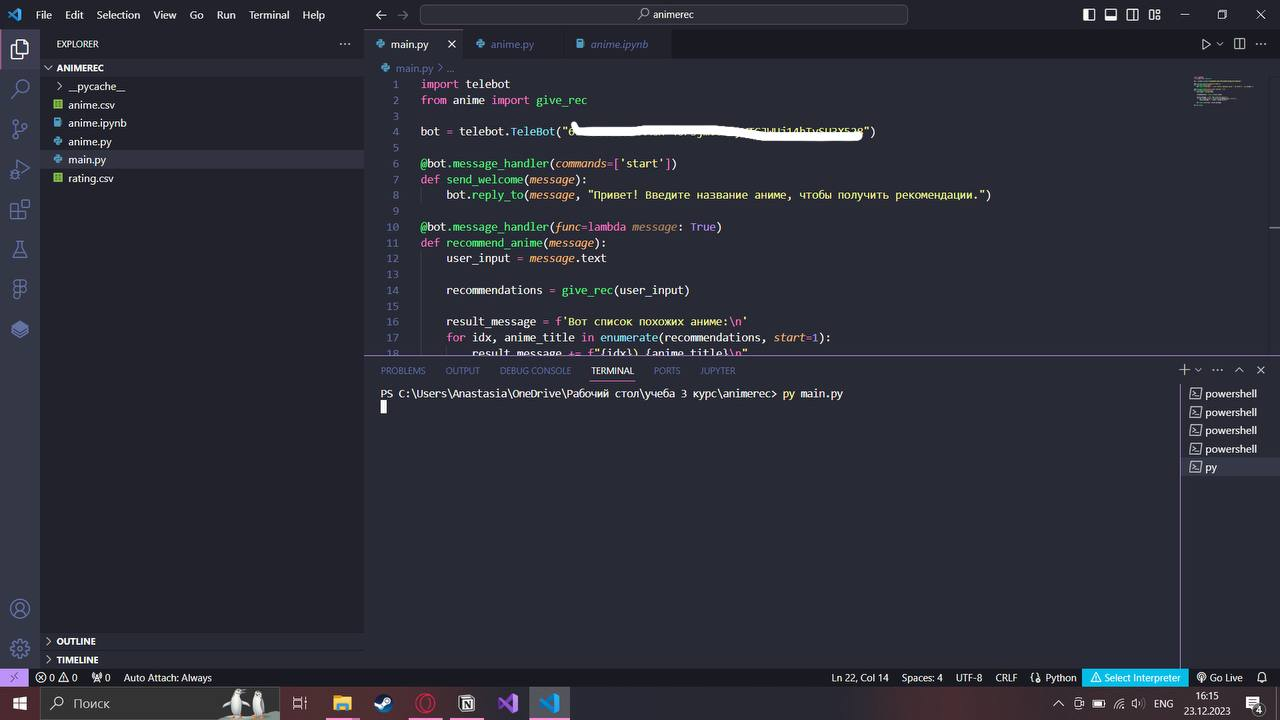

Скриншоты с результаты работы телеграм-бота

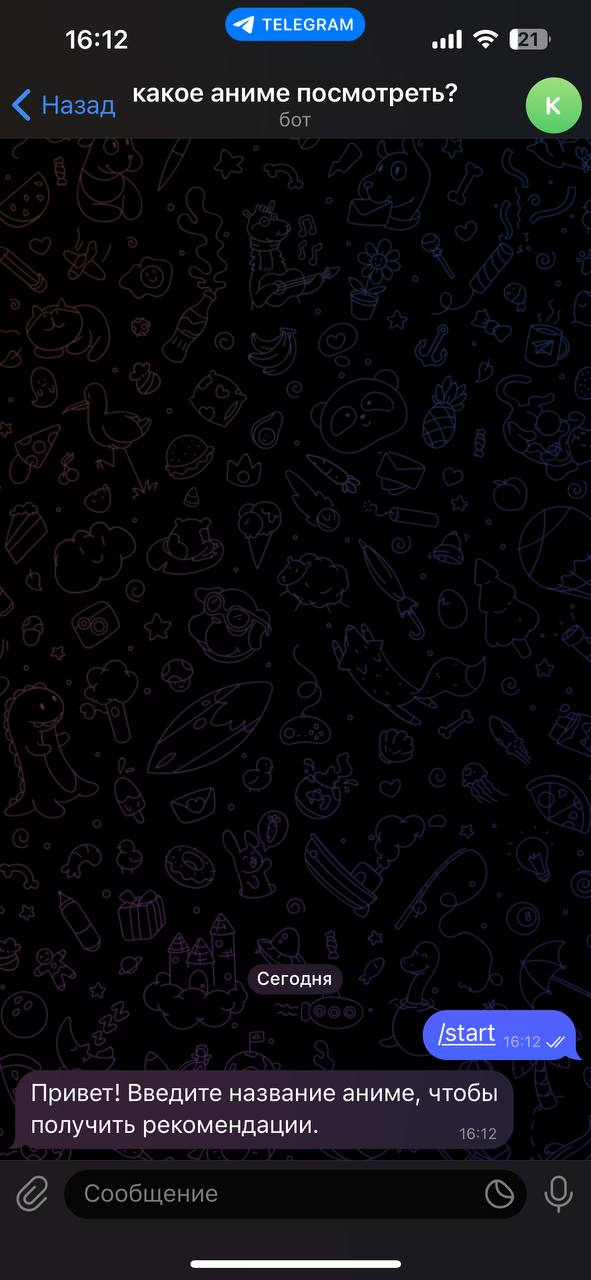

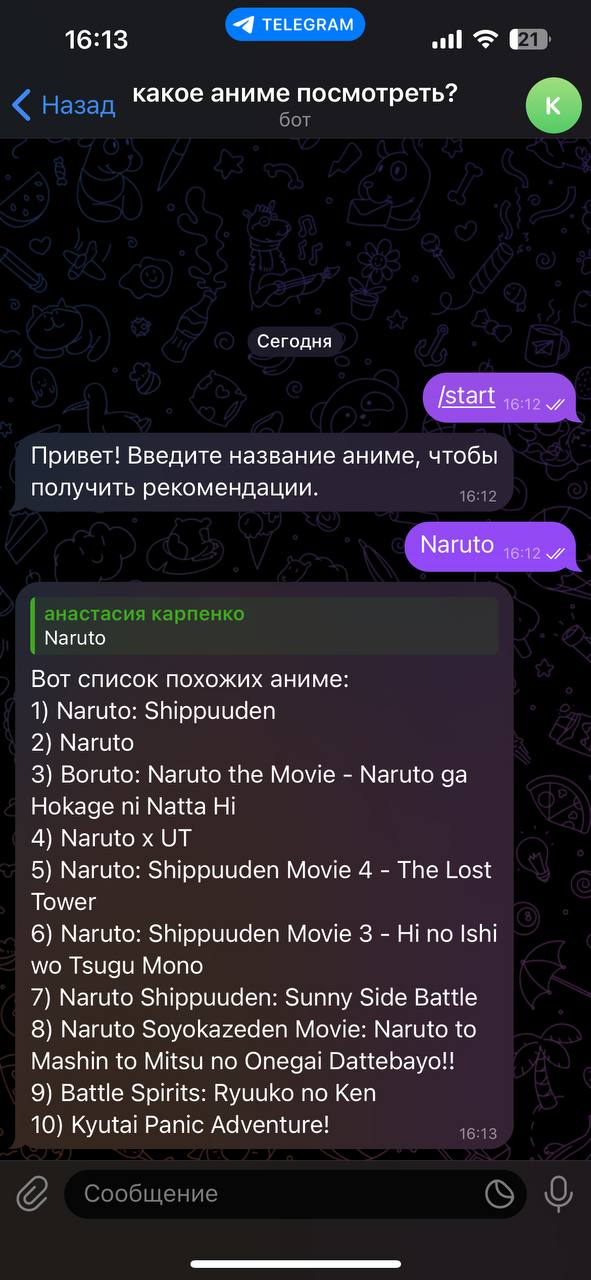

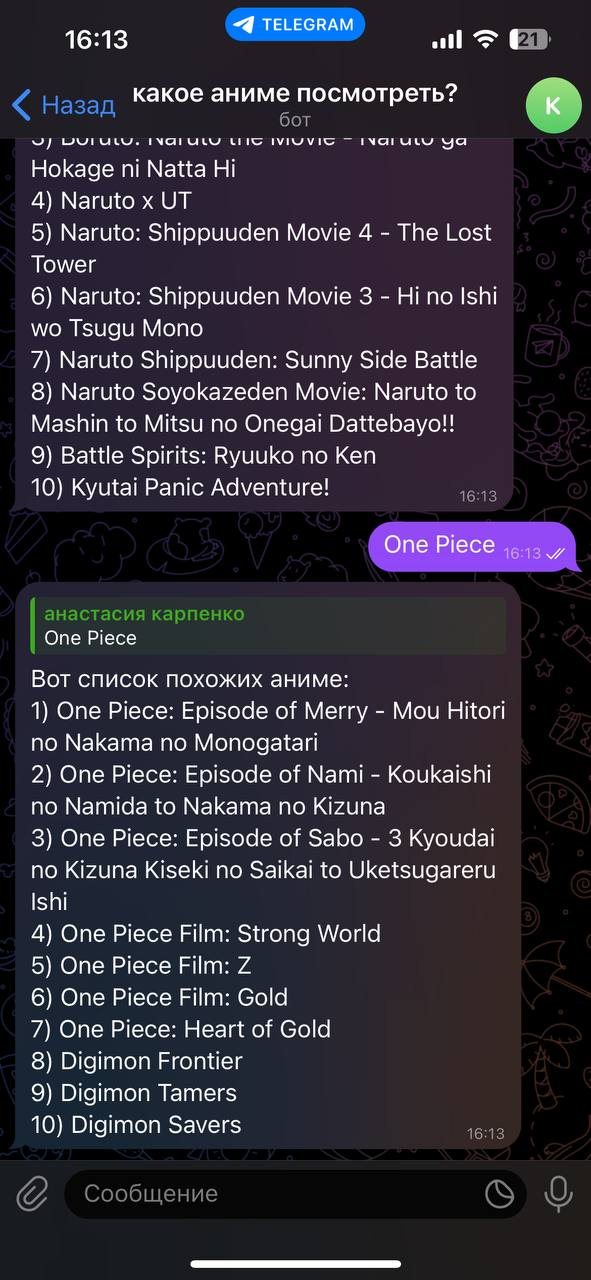